In [10]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [6]:
image_path = '../output_videos/cropped_image.jpg'
img = cv2.imread(image_path)
img  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

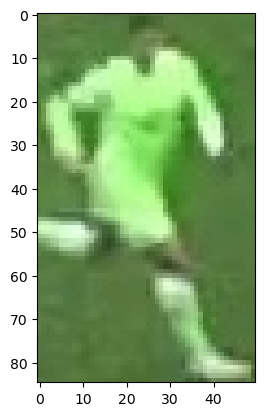

In [8]:
plt.imshow(img)
plt.show()

# Take the top half of image

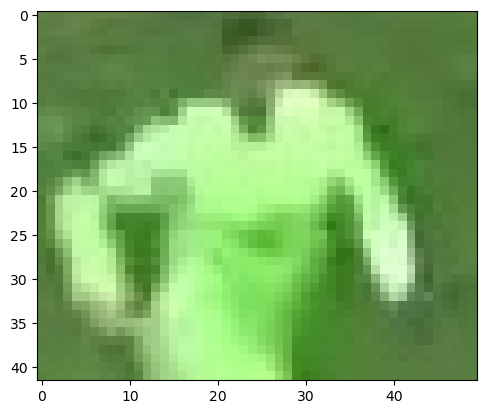

In [9]:
top_half_image = img[0: int(img.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the imagee into two

c:\Users\ollee\anaconda3\envs\dataScience\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


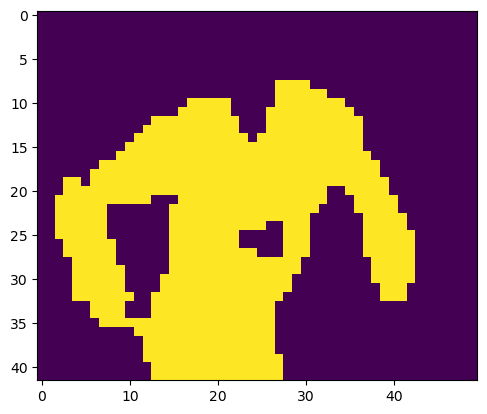

In [25]:
#reshape image to 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-mean clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshapeee the labels into the original image
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [22]:
corner_clusters = [clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key = corner_clusters.count)
print(non_player_cluster)

0


In [23]:
player_cluster = 1-non_player_cluster

In [24]:
player_cluster

1

# Cluster 1 : Player , Foreground
# Cluster 0 : Non-player, Background

In [26]:
kmeans.cluster_centers_[player_cluster]

array([171.11096433, 235.50198151, 142.78599736])